<a href="https://colab.research.google.com/github/Rosefinch-Midsummer/Awesome-Colab/blob/master/DS/Cryptocurrency_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Cryptocurrency-Price-Prediction](https://github.com/abhinavsagar/Cryptocurrency-Price-Prediction)

In [0]:
%tensorflow_version 2.x
import json
import requests
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, LSTM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [0]:
endpoint = 'https://min-api.cryptocompare.com/data/histoday'
res = requests.get(endpoint + '?fsym=BTC&tsym=CAD&limit=500')
hist = pd.DataFrame(json.loads(res.content)['Data'])
hist = hist.set_index('time')
hist.index = pd.to_datetime(hist.index, unit='s')
target_col = 'close'

In [3]:
hist.head(5)

,close,high,low,open,volumefrom,volumeto
time,,,,,,
2018-08-22,8782.87,9520.10,8634.31,8799.26,729.42,6486165.42
2018-08-23,8975.58,9136.30,8638.88,8782.87,219.50,1930224.82
2018-08-24,9100.33,9356.04,8598.39,8975.58,333.54,2988754.98
2018-08-25,9170.78,9546.28,8959.76,9191.82,172.13,1577879.17
2018-08-26,9075.46,9497.11,8776.08,9170.78,197.97,1801569.81


In [4]:
type(hist)

pandas.core.frame.DataFrame

In [0]:
def train_test_split(df, test_size=0.2):
    split_row = len(df) - int(test_size * len(df))
    train_data = df.iloc[:split_row]
    test_data = df.iloc[split_row:]
    return train_data, test_data

In [0]:
train, test = train_test_split(hist, test_size=0.2)

In [0]:
def line_plot(line1, line2, label1=None, label2=None, title='', lw=2):
    fig, ax = plt.subplots(1, figsize=(13, 7))
    ax.plot(line1, label=label1, linewidth=lw)
    ax.plot(line2, label=label2, linewidth=lw)
    ax.set_ylabel('price [CAD]', fontsize=14)
    ax.set_title(title, fontsize=16)
    ax.legend(loc='best', fontsize=16);

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


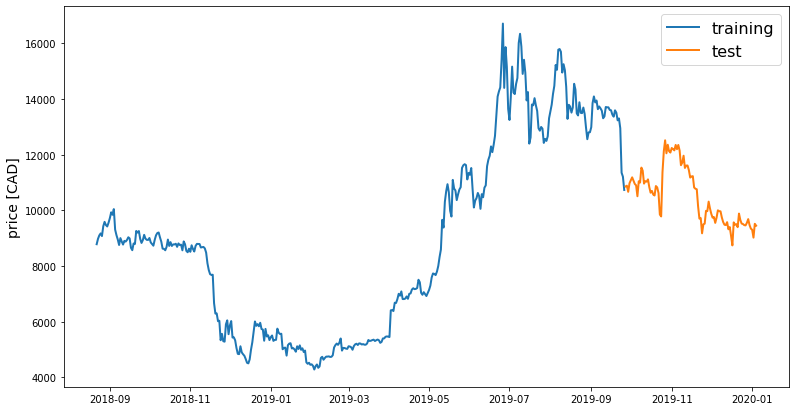

In [8]:
line_plot(train[target_col], test[target_col], 'training', 'test', title='')

In [0]:
def normalise_zero_base(df):
    return df / df.iloc[0] - 1

def normalise_min_max(df):
    return (df - df.min()) / (data.max() - df.min())

In [0]:
def extract_window_data(df, window_len=5, zero_base=True):
    window_data = []
    for idx in range(len(df) - window_len):
        tmp = df[idx: (idx + window_len)].copy()
        if zero_base:
            tmp = normalise_zero_base(tmp)
        window_data.append(tmp.values)
    return np.array(window_data)

In [0]:
def prepare_data(df, target_col, window_len=10, zero_base=True, test_size=0.2):
    train_data, test_data = train_test_split(df, test_size=test_size)
    X_train = extract_window_data(train_data, window_len, zero_base)
    X_test = extract_window_data(test_data, window_len, zero_base)
    y_train = train_data[target_col][window_len:].values
    y_test = test_data[target_col][window_len:].values
    if zero_base:
        y_train = y_train / train_data[target_col][:-window_len].values - 1
        y_test = y_test / test_data[target_col][:-window_len].values - 1

    return train_data, test_data, X_train, X_test, y_train, y_test

In [0]:
def build_lstm_model(input_data, output_size, neurons=100, activ_func='linear',
                     dropout=0.2, loss='mse', optimizer='adam'):
    model = Sequential()
    model.add(LSTM(neurons, input_shape=(input_data.shape[1], input_data.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))

    model.compile(loss=loss, optimizer=optimizer)
    return model

In [0]:
np.random.seed(42)
window_len = 5
test_size = 0.2
zero_base = True
lstm_neurons = 100
epochs = 20
batch_size = 32
loss = 'mse'
dropout = 0.2
optimizer = 'adam'

In [0]:
train, test, X_train, X_test, y_train, y_test = prepare_data(
    hist, target_col, window_len=window_len, zero_base=zero_base, test_size=test_size)

In [17]:
model = build_lstm_model(
    X_train, output_size=1, neurons=lstm_neurons, dropout=dropout, loss=loss,
    optimizer=optimizer)
history = model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=1, shuffle=True)

Train on 396 samples
Epoch 1/20
396/396 [==============================] - 2s 4ms/sample - loss: 0.0129
Epoch 2/20
396/396 [==============================] - 0s 206us/sample - loss: 0.0068
Epoch 3/20
396/396 [==============================] - 0s 220us/sample - loss: 0.0061
Epoch 4/20
396/396 [==============================] - 0s 219us/sample - loss: 0.0051
Epoch 5/20
396/396 [==============================] - 0s 214us/sample - loss: 0.0038
Epoch 6/20
396/396 [==============================] - 0s 203us/sample - loss: 0.0038
Epoch 7/20
396/396 [==============================] - 0s 221us/sample - loss: 0.0057
Epoch 8/20
396/396 [==============================] - 0s 241us/sample - loss: 0.0034
Epoch 9/20
396/396 [==============================] - 0s 213us/sample - loss: 0.0036
Epoch 10/20
396/396 [==============================] - 0s 209us/sample - loss: 0.0029
Epoch 11/20
396/396 [==============================] - 0s 205us/sample - loss: 0.0043
Epoch 12/20
396/396 [=======================

In [18]:
targets = test[target_col][window_len:]
preds = model.predict(X_test).squeeze()
mean_absolute_error(preds, y_test)

0.025944492520167877

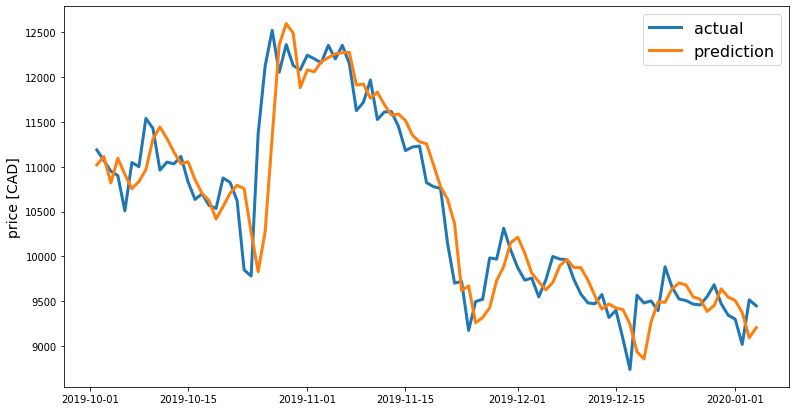

In [19]:
preds = test[target_col].values[:-window_len] * (preds + 1)
preds = pd.Series(index=targets.index, data=preds)
line_plot(targets, preds, 'actual', 'prediction', lw=3)